Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=0)
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

First 4 data

In [3]:
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1


In [4]:
test_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural


Rows and columns

In [5]:
data.shape

(491, 13)

In [6]:
test_data.shape

(123, 12)

Summary of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 53.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


Checking the duplicate value is present or not

In [9]:
data.drop_duplicates(keep=False, inplace=True)

In [10]:
data.shape

(491, 13)

Descriptive Statistics

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [12]:
data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.drop(['Loan_ID'],axis=1,inplace=True)

Contain Null value or not

In [13]:
data.isna().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test_data.isna().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

Handling Missing Values

Training Data

In [15]:
data['Gender'].fillna(method='ffill',axis='rows',inplace=True)
data['Married'].fillna(method='ffill',axis='rows',inplace=True)
data.Self_Employed.fillna(method='ffill',axis='rows',inplace=True)
data['Dependents'].fillna(method='ffill',axis='rows',inplace=True)
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].dropna().median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].dropna().median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].dropna().median())

Test Data

In [16]:
test_data['Gender'].fillna(method='ffill',axis='rows',inplace=True)
test_data['Married'].fillna(method='ffill',axis='rows',inplace=True)
test_data.Self_Employed.fillna(method='ffill',axis='rows',inplace=True)
test_data['Dependents'].fillna(method='ffill',axis='rows',inplace=True)
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].dropna().median())
test_data['Loan_Amount_Term'].fillna(method='ffill',axis='rows',inplace=True)
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].dropna().median())

Correlation HeatMap

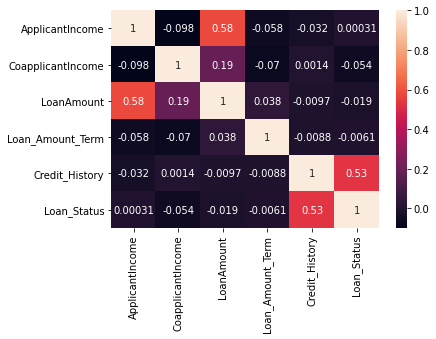

In [17]:
sns.heatmap(data.corr(),annot=True)

Visualization

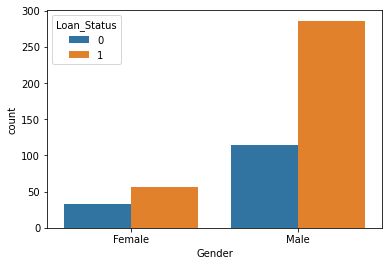

In [18]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

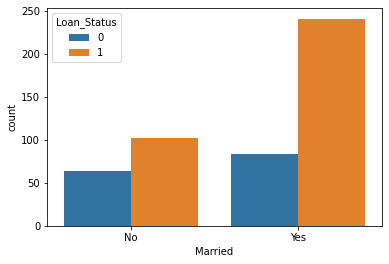

In [19]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

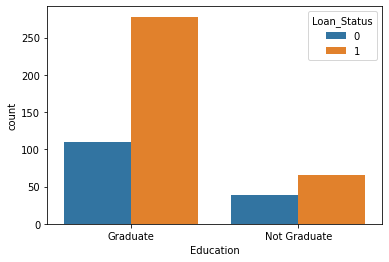

In [20]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

Converting Categorical Values into numerical values

In [21]:
cat_feat=[x for x in data.columns if data[x].dtype=='object']
cat_feat_test=[x for x in test_data.columns if data[x].dtype=='object']

#Training data
from sklearn.preprocessing import LabelEncoder
for i in cat_feat:
  le=LabelEncoder()
  data[i]=le.fit_transform(data[i].astype(str))

#test data
for i in cat_feat_test:
  le=LabelEncoder()
  test_data[i]=le.fit_transform(test_data[i].astype(str))

In [22]:
'''test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})'''

"test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})"

In [23]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0


In [24]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Dependents'].unique())


[0 1]
[0 1]
[0 3 2 1]


In [25]:
'''data['Dependents'].replace(['3+'],value=['3'],inplace=True)
test_data['Dependents'].replace(['3+'],value=['3'],inplace=True)'''

"data['Dependents'].replace(['3+'],value=['3'],inplace=True)\ntest_data['Dependents'].replace(['3+'],value=['3'],inplace=True)"

In [26]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

Feature Selection

Univariate Selction

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features =SelectKBest(chi2,k=10)
fit=best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

featurescore=pd.concat([df_columns,df_scores],axis=1)
featurescore.columns=['Featcolumn','Scores']

featurescore.nlargest(10,'Scores')

,Featcolumn,Scores
6,CoapplicantIncome,7728.101733
9,Credit_History,19.338684
7,LoanAmount,8.803296
1,Married,2.849065
3,Education,2.229123
10,Property_Area,0.865415
0,Gender,0.408309
5,ApplicantIncome,0.365911
8,Loan_Amount_Term,0.233031
2,Dependents,0.169558


In [28]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Training Data 

In [29]:
X=data.iloc[:,[0,1,3,5,6,7,8,9,10]]

Test data

In [30]:
x_test=test_data.iloc[:,[0,1,3,5,6,7,8,9,10]]

standardization

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

Select the Best Algorithm

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
models={'Logistic':LogisticRegression(),
         'SVM':SVC(),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForest':RandomForestClassifier(),
         'KNN':KNeighborsClassifier()}

         
def fit_score(model,X_train,y_train,X_test,y_test,X,y):
  np.random.seed(45)
  model_score={}
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_score[name]={'Accuracy':model.score(X_test,y_test),
                       'Cross_val':np.mean(cross_val_score(model,X,y,cv=5,scoring="accuracy"))}
  return model_score

In [36]:
Scores=fit_score(model=models,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, X=X,y=y)
pd.DataFrame(Scores.values(),Scores.keys())

,Accuracy,Cross_val
Logistic,0.837838,0.814636
SVM,0.831081,0.812595
DecisionTree,0.695946,0.714822
RandomForest,0.817568,0.792208
KNN,0.817568,0.786147


Logistic Regression

In [37]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred=model.predict(x_test)

In [39]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [40]:
import pickle
pickle.dump(model,open('loan.pkl','wb'))